# Hands op

In [1]:
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt 

from scipy import io 
import cv2

# Loading Dataset

In [2]:
dataset = io.loadmat("../00-storage/dataset/Data_hoda_full.mat")

In [3]:
Data = np.squeeze(dataset["Data"])
Labels = np.squeeze(dataset["labels"])

# Train Test Split 

In [4]:
x_train_orginal = Data[:1000]
y_train_original = Labels[:1000]

In [5]:
x_test_orginal = Data[1000:1200]
y_test_original = Labels[1000:1200]

# Cleaing Dataset

In [6]:
x_train_5by5 = [cv2.resize(img, dsize=(5, 5)) for img in x_train_orginal]
x_test_5by5 = [cv2.resize(img, dsize=(5, 5)) for img in x_test_orginal]

In [7]:
x_train_original = np.reshape(x_train_5by5, [-1,25])
x_test_original = np.reshape(x_test_5by5, [-1,25])

In [8]:
print(x_train_original.shape)
print(x_test_original.shape)

(1000, 25)
(200, 25)


In [9]:
print(y_train_original.shape)
print(y_test_original.shape)

(1000,)
(200,)


# one-hot encoding

Because my neural network output accepts, for the classes, a neuron vector where one is 1 and the rest are 0. <br/>
for example, if I have 10 classes, it should be 10 numbers all zero except one. <br/> 
and for example, if I say position seven, that positon should be 1.

num_classes = 10 -> because we have 0-9 numbers

In [10]:
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

Or we can dont give num_calsses and util fix that automaticly 

In [11]:
?keras.utils.to_categorical

Signature: keras.utils.to_categorical(x, num_classes=None)
Docstring:
Converts a class vector (integers) to binary class matrix.

E.g. for use with `categorical_crossentropy`.

Args:
    x: Array-like with class values to be converted into a matrix
        (integers from 0 to `num_classes - 1`).
    num_classes: Total number of classes. If `None`, this would be inferred
        as `max(x) + 1`. Defaults to `None`.

Returns:
    A binary matrix representation of the input as a NumPy array. The class
    axis is placed last.

Example:

>>> a = keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
>>> print(a)
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

>>> b = np.array([.9, .04, .03, .03,
...               .3, .45, .15, .13,
...               .04, .01, .94, .05,
...               .12, .21, .5, .17]).reshape(4,4)
>>> loss = keras.ops.categorical_crossentropy(a, b)
>>> print(np.around(loss, 5))
[0.10536 0.82807 0.1011  1.77196]

>>> loss = keras.ops.categorical_crossent

In [12]:
print(y_train.shape)
print(y_test.shape)

(1000, 10)
(200, 10)


In [13]:
print(y_train_original[:5])
print(y_test_original[:5])

[6 5 0 2 7]
[7 2 3 1 5]


In [14]:
print(y_train[:5])
print(y_test[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


# Normalize values to between 0-1

In [15]:
x_train = x_train_original.astype("float32")
x_test = x_test_original.astype("float32")
print(x_train.shape)
x_train[:5]

(1000, 25)


array([[153., 229.,   0.,   0., 255., 255.,   0.,  77., 255.,   0.,   0.,
        255., 255.,   0.,   0.,   0., 255.,  77.,   0.,   0.,   0., 255.,
          0.,   0.,   0.],
       [  0.,   0., 255.,   0.,   0.,   0., 255., 128., 255.,   0., 204.,
         51.,   0.,  51., 204., 255.,   0., 255.,   0., 255.,  51., 229.,
        255., 153., 204.],
       [255., 255., 255., 128., 255., 255., 255., 255., 255., 255., 255.,
        128., 128., 255., 255., 255., 255., 255., 255., 255.,   0., 255.,
        255., 128.,   0.],
       [255.,   0.,   0.,   0., 255., 255., 255., 255., 179.,   0.,  26.,
        255.,   0.,   0.,   0.,   0., 255.,   0.,   0.,   0.,  51., 255.,
          0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 255., 255.,  94.,   0.,  94., 255.,   0.,
        255.,   0., 255.,  76.,   0.,   0., 255., 255.,   0.,   0.,   0.,
        255., 229.,   0.]], dtype=float32)

pictures are pixels between 0-255 

In [16]:
x_train /= 255

In [17]:
x_test /= 255

In [18]:
x_train[:5]

array([[0.6       , 0.8980392 , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.3019608 , 1.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.3019608 , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.5019608 , 1.        , 0.        ,
        0.8       , 0.2       , 0.        , 0.2       , 0.8       ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.2       , 0.8980392 , 1.        , 0.6       , 0.8       ],
       [1.        , 1.        , 1.        , 0.5019608 , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.5019608 , 0.5019608 , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.        , 1.        , 1.        , 0.

# Model Architecture 

In [19]:
model = Sequential()
model.add(Input(shape=(25,))) # instead of input_dim in latest versions 
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

Why 1,664 Param in first layer? => meaning of weights and bias: <br/> 
- ((64 (neuron) * 25 (connected to next neurons layer from inputs)) = 1600 + (bias(to the number of neurons in the layer)) = 64) = 1,664

Why 650 Param in output layer? => conneted to the previouse layers 
- ((10 (number of output layout neurons) * 64 (number of privouse layers neuron)) + (bias(to the number of neurons in the layer) = 10) = 650

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,314 (9.04 KB)

 Trainable params: 2,314 (9.04 KB)

 Non-trainable params: 0 (0.00 B)

# Compile Model 

In [21]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)

# Train the model with training data

- x_train => (1000, 25)
- y_train => (1000, 10) -> one-hot format
- epochs => see it a hundred times
- batch_size => see 64 samples each time
- validation_split (optional) => that means out of these thousand samples, don't look at 20% of them and use them as model evaluation, and this is different from the test data 

In [22]:
?model.fit

Signature:
model.fit(
    x=None,
    y=None,
    batch_size=None,
    epochs=1,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=None,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
)
Docstring:
Trains the model for a fixed number of epochs (dataset iterations).

Args:
    x: Input data. It can be:
        - A NumPy array (or array-like), or a list of arrays
        (in case the model has multiple inputs).
        - A backend-native tensor, or a list of tensors
        (in case the model has multiple inputs).
        - A dict mapping input names to the corresponding array/tensors,
        if the model has named inputs.
        - A `keras.utils.PyDataset` returning `(inputs, targets)` or
        `(inputs, targets, sample_weights)`.
        - A `tf.data.Dataset` yielding `(inputs, targets)` or
        `(in

In [23]:
history = model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.2250 - loss: 2.1844 - val_accuracy: 0.4150 - val_loss: 2.0368
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4663 - loss: 1.9843 - val_accuracy: 0.5550 - val_loss: 1.8632
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5700 - loss: 1.8223 - val_accuracy: 0.6450 - val_loss: 1.7066
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6438 - loss: 1.6666 - val_accuracy: 0.7000 - val_loss: 1.5539
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6938 - loss: 1.5162 - val_accuracy: 0.7300 - val_loss: 1.4164
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7375 - loss: 1.3739 - val_accuracy: 0.7500 - val_loss: 1.2845
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7625 - loss: 1.2388 - val_accuracy: 0.7800 - val_loss: 1.1586
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7800 - loss: 1.1135 - val_accuracy: 0.7850 - 

Where did this 13(Epoch13) come from?
- (train sample size(1000)) * (1 - 0.2(validation_split) = 0.8) = 800 -> sample using for train 
- How many iterations am I running in each epoch? 100 -> that is, watch the whole data 100 tomes
- How many updated do I get each time I view the entire dataset (or each epoch) ? 64 -> according to the batch_size
- 800 / 64 = 12.5 -> rounded to up => ***13***

What's verbose arg? 
- This is done to set the model's logging
- Forexample, 0 display nothing anymore, 1 is the default, 2 doesn't show the progress bar, and so on

In [24]:
history

In [25]:
history.epoch[-5:]

[95, 96, 97, 98, 99]

In [26]:
history.model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,630 (18.09 KB)

 Trainable params: 2,314 (9.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,316 (9.05 KB)

In [27]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [28]:
history.history["accuracy"][-5:]

[0.9674999713897705,
 0.9674999713897705,
 0.9674999713897705,
 0.9712499976158142,
 0.9725000262260437]

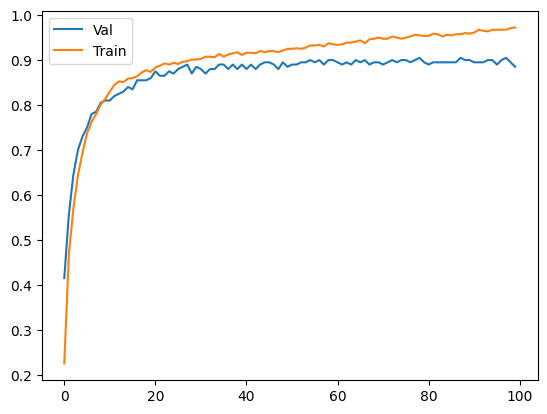

In [29]:
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["accuracy"])
plt.legend(["Val", "Train"])

# Evaluation model on the test data 

In [30]:
loss, acc = model.evaluate(x_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9250 - loss: 0.2555 


In [31]:
print("\nTesting loss: %.2f, acc: %.2f%%"%(loss, acc))


Testing loss: 0.26, acc: 0.93%


# Predict data

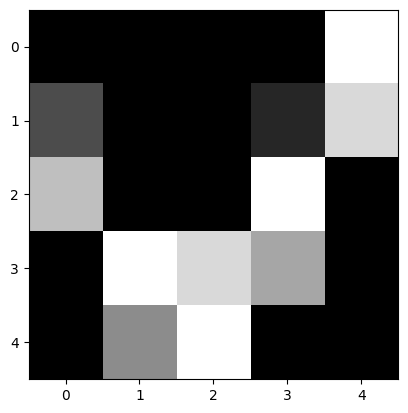

In [32]:
plt.imshow(x_test[0].reshape(5,5), cmap="gray")

In [33]:
modelPredicted = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [34]:
modelPredicted.shape

(200, 10)

In [35]:
modelPredicted[0]

array([4.4865237e-06, 1.3190734e-06, 1.3062188e-05, 1.5748346e-05,
       3.2906274e-07, 6.0809853e-06, 4.4664444e-05, 9.9991393e-01,
       3.5020693e-09, 2.9877671e-07], dtype=float32)

In [36]:
modelPredicted[0].max()

0.99991393

In [37]:
modelPredicted[0].argmax()

7

In [38]:
modelPredicted.max(axis=1)[-5:]

array([0.9678956 , 0.8634193 , 0.6350875 , 0.90033245, 0.9999968 ],
      dtype=float32)

In [39]:
modelPredicted.argmax(axis=1)[-5:]

array([0, 1, 4, 9, 5], dtype=int64)

In [40]:
y_test.argmax(axis=1)[-5:]

array([0, 1, 4, 9, 5], dtype=int64)

In [41]:
modelPredicted.argmax(axis=1)[100:150] == y_test.argmax(axis=1)[100:150]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True])

In [42]:
(np.sum(modelPredicted.argmax(axis=1)[100:150] == y_test.argmax(axis=1)[100:150]) / 50) * 100

90.0

In [43]:
np.mean(modelPredicted.argmax(axis=1)[100:150] == y_test.argmax(axis=1)[100:150]) * 100

90.0